<a href="https://colab.research.google.com/github/raflidzaky/scrap-job-listing/blob/master/Job_Listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skills Info

In [35]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [1]:
# Load the CSV file
df = pd.read_csv('result.csv')

# Initialize a list to hold all skills
all_skills = []

# Iterate over the skills column and split the skills into a list
for skills in df['skills'].dropna():  # Drop NaN values to avoid errors
    # Split skills by comma and strip any extra whitespace
    skill_list = [skill.strip() for skill in skills.split(',')]
    all_skills.extend(skill_list)  # Add to the list of all skills

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Convert to a DataFrame for better readability
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

# Sort the DataFrame by count in descending order
skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False)

# Print the most popular skills
print(skill_counts_df)

# Save the results to a new CSV file
skill_counts_df.to_csv('skill_counts.csv', index=False)


                   Skill  Count
9   software engineering     20
8        data structures     11
7               database     10
40                  hive     10
6                storage      8
..                   ...    ...
56        mdm techniques      1
57     business analysis      1
58         data engineer      1
60      sql and big data      1
98            middleware      1

[99 rows x 2 columns]


In [24]:
# Show original data set for glimpse
df.head(5)

,company,position,skills
0,IBM India Pvt Ltd,Data Engineer,"data integration expertise, etl / elt tools,..."
1,IBM India Pvt Ltd,Data Engineer,"data modeling techniques, azure data factory, ..."
2,IBM India Pvt Ltd,Data Engineer,"data modeling expertise, azure data factory, d..."
3,IBM India Pvt Ltd,Data Engineer,"data modeling expertise, azure data factory, d..."
4,IBM India Pvt Ltd,Data Engineer,"data warehousing expertise, etl process know..."


In [34]:
# Further glimpse with basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   company   25 non-null     object
 1   position  24 non-null     object
 2   skills    25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [31]:
# Show skills data set for glimpse
# Show top 5 only
df2 = pd.read_csv('skill_counts.csv')
top_skills = df2.head(5)
top_skills

,Skill,Count
0,software engineering,20
1,data structures,11
2,database,10
3,hive,10
4,storage,8


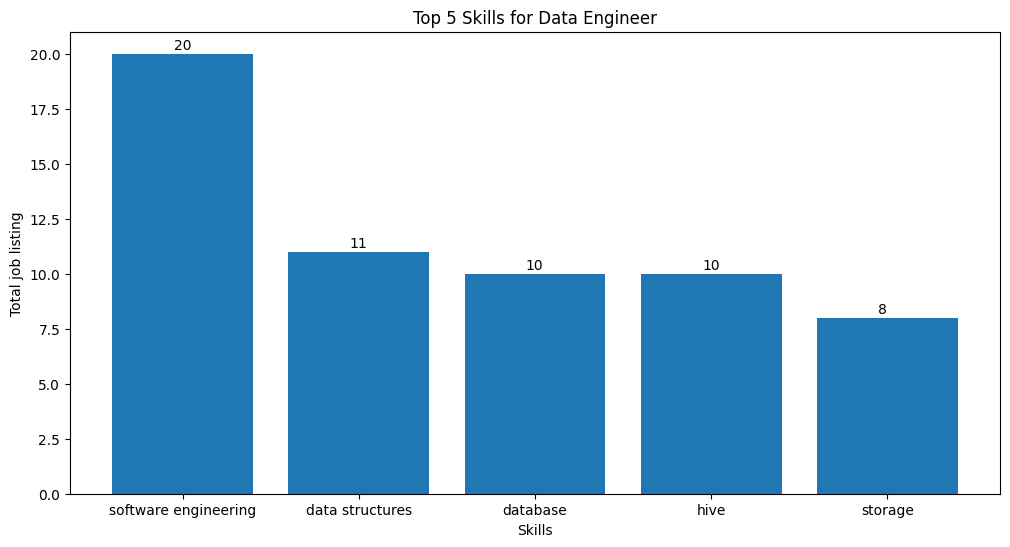

In [22]:
# Make plot to visualize each skills distribution

# Set the canvas up
fig, ax = plt.subplots(figsize=[12,6])

# Set the plot (from X and Y axis)
plot = plt.bar(top_skills['Skill'], top_skills['Count'])

# Set title, axis title, and number info to prettify the chart
plt.title('Top 5 Skills for Data Engineer')
plt.xlabel('Skills')
plt.ylabel('Total job listing')

for i in plot:
  plt.text(
            i.get_x() + i.get_width()/2.3, # Position of number info in x-axis
            i.get_height() + 0.2, # Position of number info in y-axis
           int(i.get_height()) # Content of the number info
           )

# Company Info

In [28]:
# Before showing as a plot, I will see the unique values and their count
company_counts = df['company'].value_counts()
company_counts

,count
company,
IBM India Pvt Ltd,24
axmiyan hr solutions private limited,1


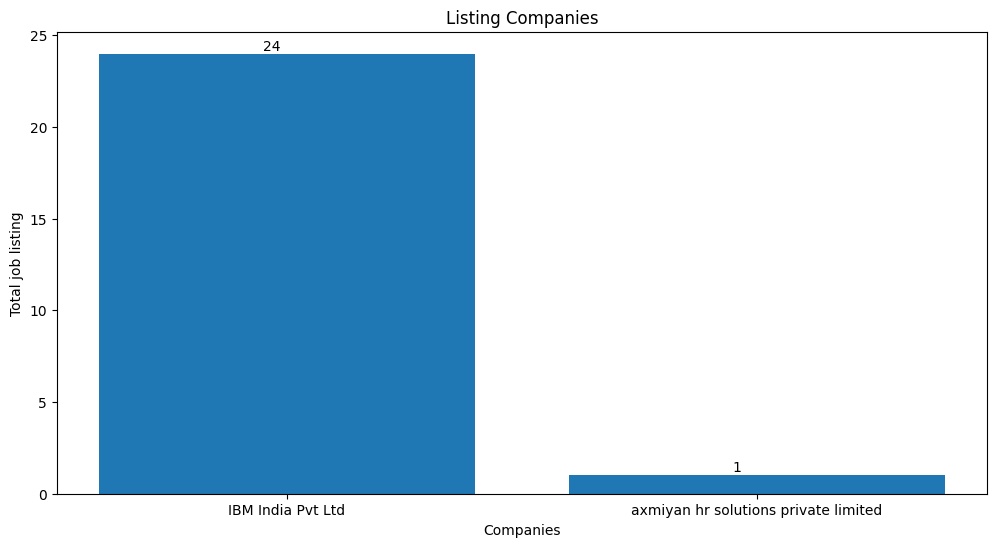

In [29]:
# Make the plot
# Majority of job listing comes from IBM India Pvt Ltd.
fig, ax = plt.subplots(figsize=[12,6])
plot = plt.bar(company_counts.index, company_counts)

plt.title('Listing Companies')
plt.xlabel('Companies')
plt.ylabel('Total job listing')

for i in plot:
  plt.text(i.get_x() + i.get_width()/2.3, i.get_height() + 0.2,
           int(i.get_height())
           )